In [67]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
def mappaCalore(url1, url2) :
    weather1 = pd.read_csv(url1, parse_dates=["time"])
    weather1["precipitation_sum (mm)"] = weather1["precipitation_sum (mm)"].replace(np.nan, 0)
    weather1.rename(columns={
        "temperature_2m_max (°C)": "max_temp",
        "temperature_2m_min (°C)": "min_temp",
        "temperature_2m_mean (°C)": "mean_temp",
        "precipitation_sum (mm)": "precipitation"
    }, inplace=True)

    mesi = weather1["time"].dt.strftime('%m')
    giorni = weather1["time"].dt.strftime('%d')
    new_weather1 = pd.DataFrame({"mese" : mesi, "giorno" : giorni, "temperatura" : weather1["mean_temp"]})

    print(new_weather1.temperatura.mean())

    new_weather1 = new_weather1.pivot(index='giorno',columns='mese',values='temperatura')

    weather2 = pd.read_csv(url2, parse_dates=["time"])
    weather2["precipitation_sum (mm)"] = weather2["precipitation_sum (mm)"].replace(np.nan, 0)
    weather2.rename(columns={
        "temperature_2m_max (°C)": "max_temp",
        "temperature_2m_min (°C)": "min_temp",
        "temperature_2m_mean (°C)": "mean_temp",
        "precipitation_sum (mm)": "precipitation"
    }, inplace=True)

    mesi = weather2["time"].dt.strftime('%m')
    giorni = weather2["time"].dt.strftime('%d')
    new_weather2 = pd.DataFrame({"mese" : mesi, "giorno" : giorni, "temperatura" : weather2["mean_temp"]})

    print(new_weather2.temperatura.mean())

    new_weather2 = new_weather2.pivot(index='giorno',columns='mese',values='temperatura')


    fig, axs = plt.subplots(ncols=2)
    fig.set_figwidth(13)
    seaborn.heatmap(new_weather2, ax=axs[0], cbar=True)
    seaborn.heatmap(new_weather1, ax=axs[1], cbar=True)

    plt.show()

14.466666666666669
15.807818930041146


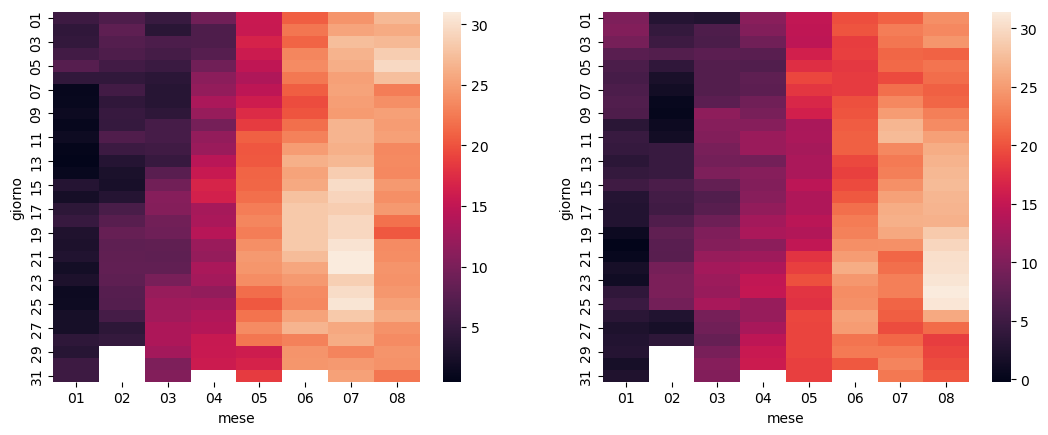

In [97]:
mappaCalore("data/heatmap_data/milano_2023.csv", "data/heatmap_data/milano_2022.csv")

In [70]:
mappaCalore("data/milano_2022.csv")

TypeError: mappaCalore() missing 1 required positional argument: 'url2'